<h2><font color="#004D7F" size=6>Módulo 4. Machine Learning</font></h2>

<h1><font color="#004D7F" size=5>1. Algoritmo Regresión KNN </font></h1>

<h1><font color="#004D7F" size=5>2. Taller de  Precio de Autos </font></h1>
<br>
<div style="text-align: right">
<font color="#004D7F" size=3>Luisa López Vázquez</font><br>
<font color="#004D7F" size=3>Diplomado en Ciencia de Datos</font><br>

Para realizar un análisis con knn tenemos siempre de normalizar los datos, re-escalar todas las variables para que las distancias sean equiparables(homologable). Este proceso se suele llamar: estandarización de los datos.

Otro importante asunto es que hay que eliminar los NA de los datos, pues afectan a los cálculos de distancia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Cargar datos 
carros = pd.read_csv("carros.csv")

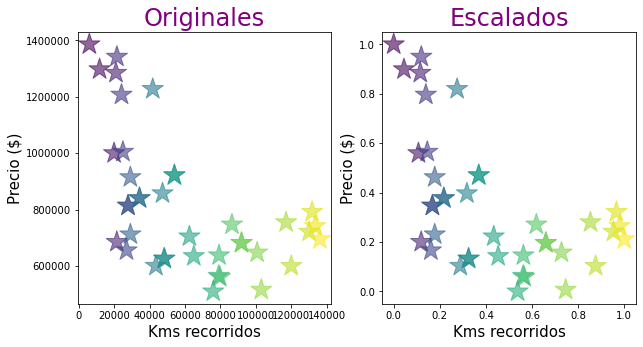

In [2]:

# Graficar datos crudos: kms vs precio
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 2, 1)

ax.scatter(carros["kms"], carros["precio"], marker="*",
           s=500, c=range(carros["kms"].size), alpha=0.6)

ax.set_title("Originales", size=24, color="purple")
ax.set_ylabel("Precio ($)", size=15)
ax.set_xlabel("Kms recorridos", size=15)
ax.ticklabel_format(style="plain")


# Escalamiento de los datos 
escala_kms = preprocessing.MinMaxScaler()
escala_precio = preprocessing.MinMaxScaler()
kms = escala_kms.fit_transform(carros["kms"].values.reshape(-1, 1))
precio = escala_precio.fit_transform(carros["precio"].values.reshape(-1, 1))


# Graficar datos escalados: kms vs precio
ax = fig.add_subplot(1, 2, 2)

ax.scatter(kms, precio, marker="*", 
           s=500, c=range(kms.size), alpha=0.6)

ax.set_title("Escalados", size=24, color="purple")
ax.set_ylabel("Precio ($)", size=15)
ax.set_xlabel("Kms recorridos", size=15)
ax.ticklabel_format(style="plain")

plt.show()

### Queremos encontrar el precio de un vehiculo.
### K= 3
Verificamos cual es el precio de los tres carros.

Obtenemos el promedio ese seria el resultado de nuestra regresión.

Precio aproximado $600,000.00

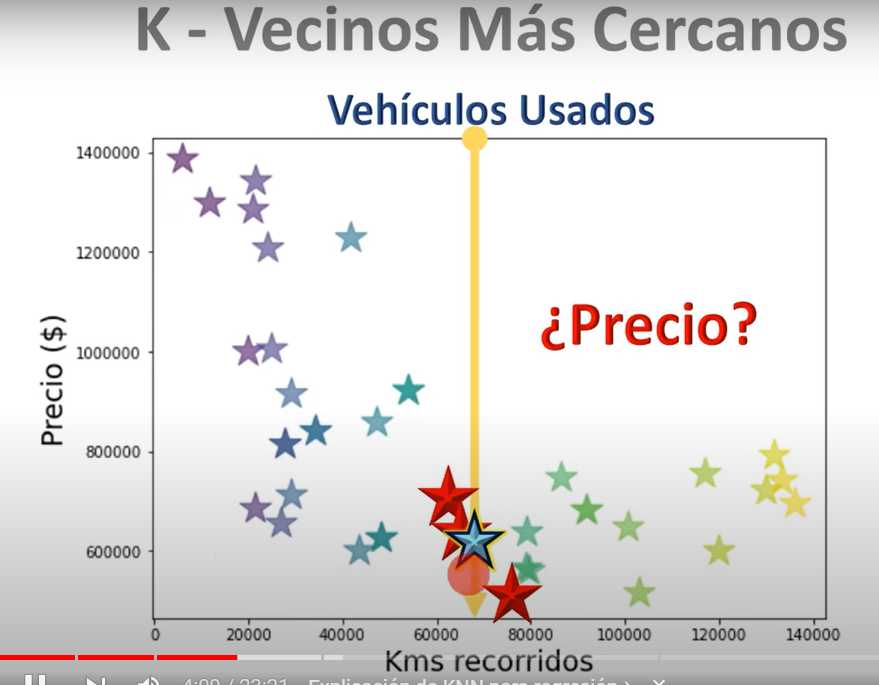


</br>
Asi podriasmos estar buscando precios para mas autos con difrente kilometraje

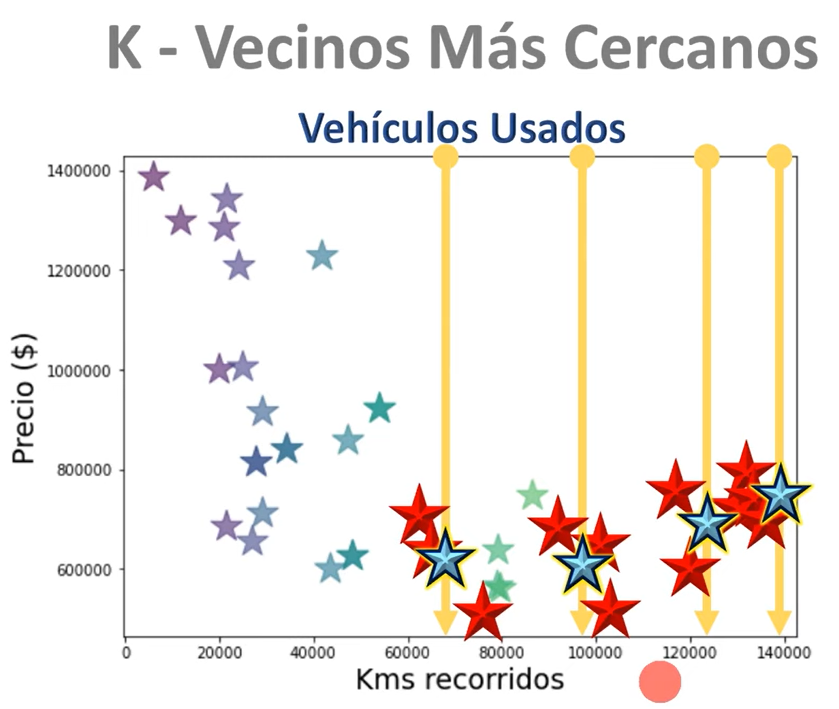


<br><br>
# Creación de Modelo KNN (regresión)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(kms,precio)

#datos de un nuevo auto km=20000
kms_instancia = escala_kms.transform([[56000]])

#Predice el precio del nuevo auto
precio_instancia = knn.predict(kms_instancia)

#Escalamiento inverso para ver precio real
escala_precio.inverse_transform(precio_instancia)

array([[849487.]])

In [4]:
precio_instancia

array([[0.38775881]])

In [5]:
kms_instancia

array([[0.38384459]])

<br><br>
# Precios de Carros de 0 a 140,000 km

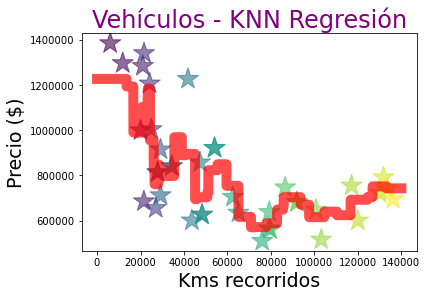

In [12]:
# Múltiples regresiones de los valores dentro del rango
kms_instancias=escala_kms.transform(np.arange(140000).reshape(-1,1))
precio_instancias=knn.predict(kms_instancias)
todas=escala_precio.inverse_transform(precio_instancias)
todas=todas.reshape(-1,1)

fig =plt.figure(figsize=(6,4))

plt.plot(np.arange(140000), todas.reshape(1, -1)[0], 
        linewidth=10, color="red", alpha=0.7)


plt.scatter(carros["kms"], carros["precio"], marker="*", s=500, c=range(carros["kms"].size), alpha=0.6)

#Agregar los titulos a la grafica
plt.title("Vehículos - KNN Regresión", size=24, color="purple")
plt.ylabel("Precio ($)", size=19)
plt.xlabel("Kms recorridos", size=19)
plt.ticklabel_format(style="plain")
plt.show()

In [9]:
todas

array([[1227846.        ],
       [1227846.        ],
       [1227846.        ],
       ...,
       [ 742707.33333333],
       [ 742707.33333333],
       [ 742707.33333333]])

<br><br>
# Regresores KNN para diferentes vecinos 

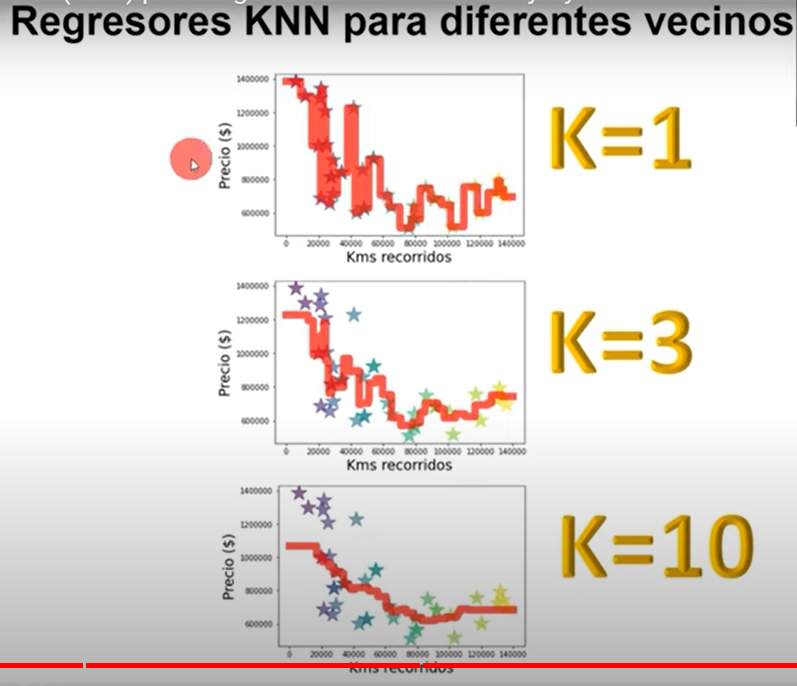
